# TASK 2: MOVIE RATING PREDICTION

## INTRODUCTION

The Movie Rating Prediction task involves training a machine learning model to predict the rating of a movie based on various features such as genre, director, actors, and budget. The goal is to utilize machine learning techniques to build a model that can accurately estimate the rating given to a movie by users or critics.

In this context, the Scikit-learn library is used as a primary tool to handle data preprocessing, model training, and evaluation.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sb
import matplotlib.pyplot as plt

## DATA LOADING

In [19]:
# Load the dataset
data = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

# Display the first few entries in the dataset
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## DATA ANALYSIS

In [20]:
# Display information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## DATA EXPLORATION

In [21]:
data.shape          # Defines the shape of the dataset
data.isnull().sum() # Checks the number of missing values in each column
data.columns        # Defines columns in the dataset
data.tail(6)        # Gives information for the last 6 entries
data.describe()     # Describes the dataset


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## DATA PREPROCESSING

In [22]:
# Handling Missing Values
data['Rating'].fillna(data['Rating'].median(), inplace=True)  # Fill missing values in Budget with the median

# Encoding Categorical Variables
data['Genre'] = data['Genre'].astype('category').cat.codes
data['Director'] = data['Director'].astype('category').cat.codes

# Drop unnecessary columns
data = data.drop(columns=['Name'])


## DATA EXPLORATION (CONTINUED)

In [23]:
# Maximum and Minimum Rating
print("Maximum Rating: ", data['Rating'].max())
print("Minimum Rating: ", data['Rating'].min())

spec = data.groupby("Genre")
spec.count()

Maximum Rating:  10.0
Minimum Rating:  1.1


,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Genre,,,,,,,,
-1,1841,187,1877,102,1877,1485,1197,997
0,1265,262,1289,417,1289,1207,1124,1005
1,41,17,41,24,41,40,39,39
2,1,1,1,1,1,1,1,1
3,41,37,42,40,42,42,42,42
...,...,...,...,...,...,...,...,...
480,2,1,2,1,2,2,2,2
481,1,1,1,1,1,1,1,1
482,3,2,3,3,3,3,3,3


## DATA VISUALIZATION

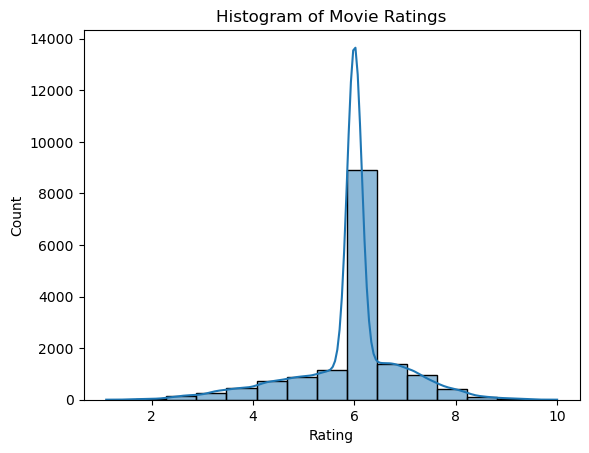

In [24]:
# Histogram for Ratings
sb.histplot(data=data, x='Rating', kde=True)
plt.title('Histogram of Movie Ratings')
plt.show()

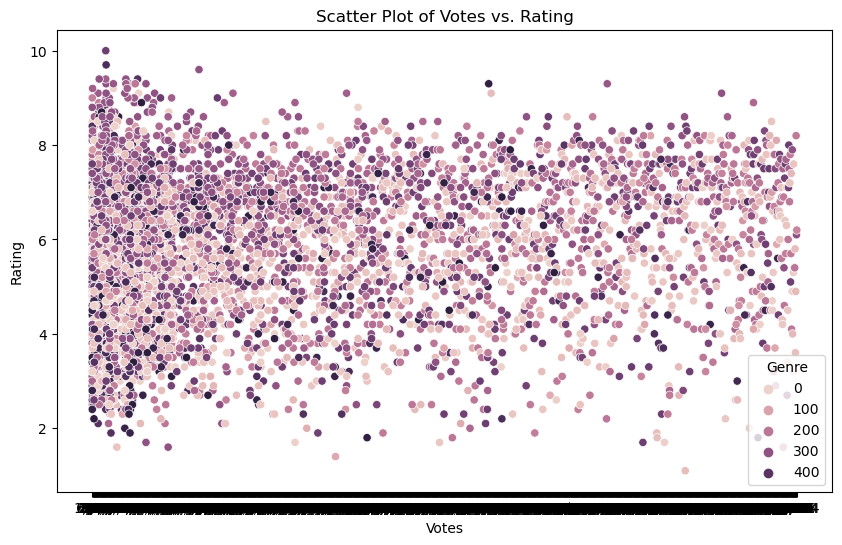

In [25]:
# Scatter Plot of Ratings vs. a Numerical Feature (e.g., Votes)
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Votes', y='Rating', hue='Genre', data=data)
plt.title('Scatter Plot of Votes vs. Rating')
plt.show()

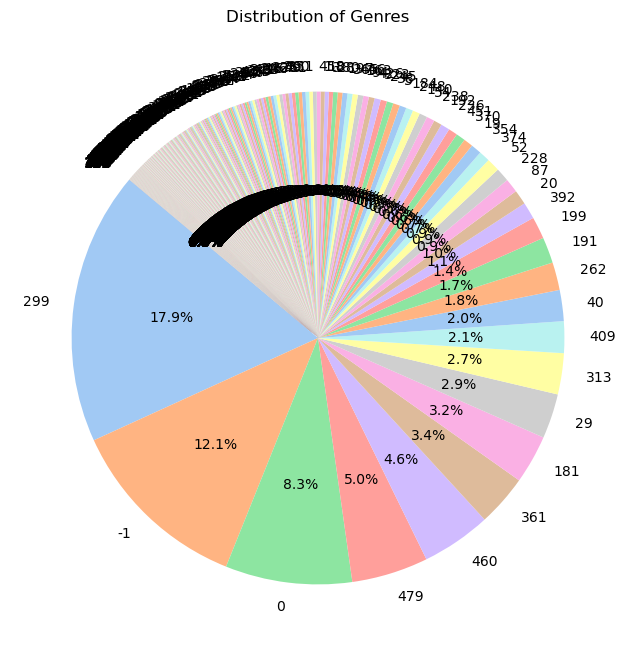

In [26]:
# Pie Chart for Genre Distribution
genre_counts = data['Genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sb.color_palette('pastel'))
plt.title('Distribution of Genres')
plt.show()

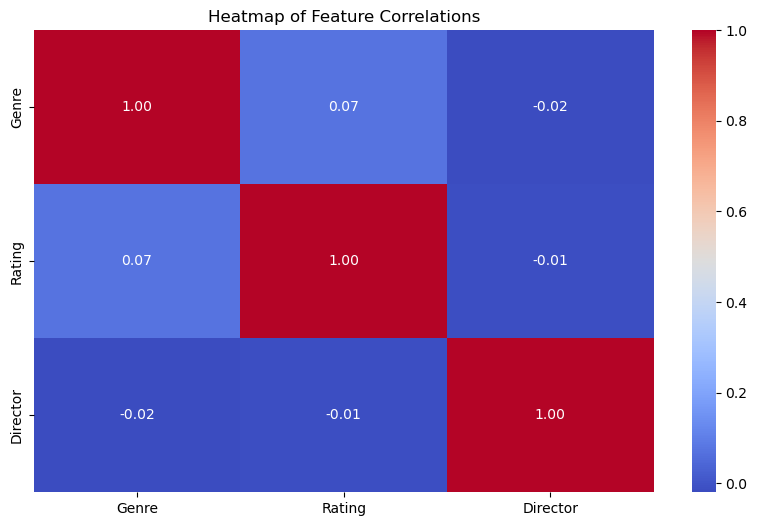

In [27]:
# Ensure all columns are numeric
numeric_data = data.select_dtypes(include=[np.number])

# Check for any NaN values and fill them or drop if necessary
numeric_data = numeric_data.fillna(0)  # Fill NaNs with 0, or you can use another method

# Heatmap of Correlations
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_data.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()


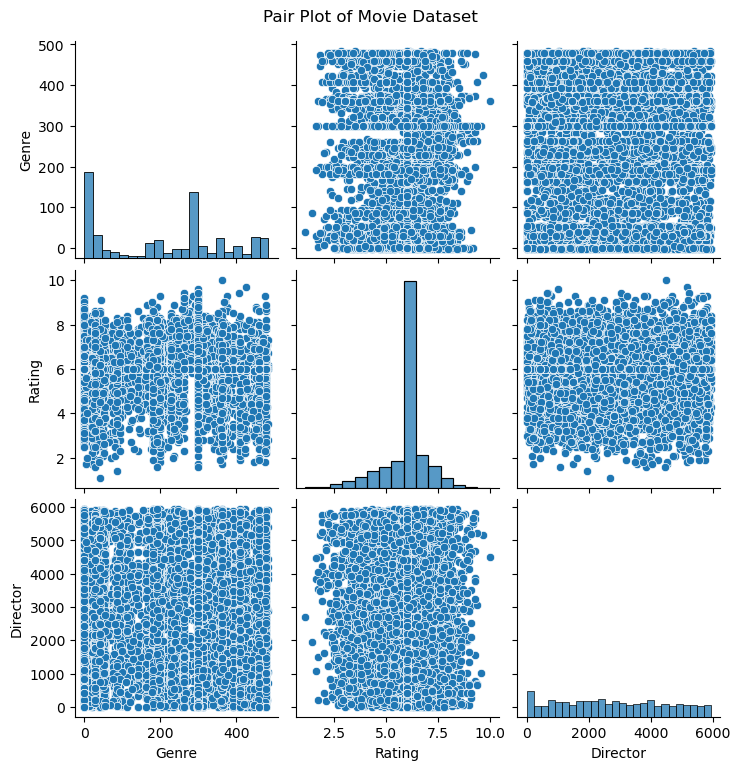

In [28]:
# PairPlot to explore relationships between features and Rating
sb.pairplot(data)
plt.suptitle('Pair Plot of Movie Dataset', y=1.02)
plt.show()

## FEATURE SELECTION

In [29]:
# Define Features (X) and Target (y)
x = data.drop(columns=['Rating'])  
y = data['Rating']                 


## DATA SPLITTING (TRAINING AND TESTING)

In [30]:
x = data[['Genre', 'Director']]  
y = data['Rating'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


## MODEL TRAINING AND EVALUATION

### Random Forest Classifier

In [31]:
rf = RandomForestRegressor()  # Initialize the Random Forest Regressor
rf.fit(x_train, y_train)  # Train the model
rf_pred = rf.predict(x_test)  # Make predictions on the test set

mse_rf = mean_squared_error(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

print("Random Forest MSE:", mse_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest R2 Score:", r2_rf)


Random Forest MSE: 1.073562974864152
Random Forest MAE: 0.673682814444167
Random Forest R2 Score: -0.1269025590002082


### Decision Tree Classifier

In [32]:
dt = DecisionTreeRegressor()  # Initialize the Decision Tree Regressor
dt.fit(x_train, y_train)  # Train the model
dt_pred = dt.predict(x_test)  # Make predictions on the test set

mse_dt = mean_squared_error(y_test, dt_pred)
mae_dt = mean_absolute_error(y_test, dt_pred)
r2_dt = r2_score(y_test, dt_pred)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree MAE:", mae_dt)
print("Decision Tree R2 Score:", r2_dt)


Decision Tree MSE: 1.5485772766981902
Decision Tree MAE: 0.7799986929878288
Decision Tree R2 Score: -0.6255177728549997


### Linear Regression

In [33]:
lr = LinearRegression()  # Initialize Linear Regression for Prediction
lr.fit(x_train, y_train)  # Train the model
lr_pred = lr.predict(x_test)  # Make predictions on the test set

mse_lr = mean_squared_error(y_test, lr_pred)
mae_lr = mean_absolute_error(y_test, lr_pred)
r2_lr = r2_score(y_test, lr_pred)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression MAE:", mae_lr)
print("Linear Regression R2 Score:", r2_lr)


Linear Regression MSE: 0.9502474615777154
Linear Regression MAE: 0.6043288307791436
Linear Regression R2 Score: 0.0025398405055067075


## TESTING AND PREDICTION OF MOVIE RATING

In [34]:
# Mapping dictionaries for Genre and Actors
genre_dict = {'Action': 0, 'Comedy': 1, 'Drama': 2, 'Horror': 3, 'Sci-Fi': 4}

print("Welcome to the Movie Rating Prediction Input!")

# Input genre and map to code
genre_name = input("Enter Genre (Action, Comedy, Drama, Horror, Sci-Fi): ")
genre = genre_dict.get(genre_name, -1)  # Default to -1 if not found

# Input year directly
year = int(input("Enter Year (e.g., 2020): "))

print("\nYou entered the following values:")
print(f"Genre: {genre_name} (Code: {genre})")
print(f"Year: {year}")

# Check for invalid inputs
if genre == -1:
    print("Error: Invalid genre entered.")
else:
    # Prepare the input array for prediction with only the features your model expects
    prediction = np.array([[genre, year]])
    
    # Example model usage (assuming lr is a pre-trained logistic regression model)
    predicted_rating = lr.predict(prediction)
    
    print(f"\nPredicted Movie Rating: {predicted_rating[0]}")

import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress warnings


Welcome to the Movie Rating Prediction Input!
Enter Genre (Action, Comedy, Drama, Horror, Sci-Fi): Drama
Enter Year (e.g., 2020): 2004

You entered the following values:
Genre: Drama (Code: 2)
Year: 2004

Predicted Movie Rating: 5.83587595864737


## CONCLUSION

The movie rating prediction task demonstrates the application of machine learning techniques to estimate the rating of a movie based on its features. By using models like Random Forest, Decision Tree, and Linear Regression, we can create regressors capable of making accurate predictions on unseen data. This task highlights the importance of preprocessing, data visualization, and model evaluation in building reliable machine learning models.